<a href="https://colab.research.google.com/github/cascadenite/inspector_app/blob/main/processImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image preprocessing

This notebook has various steps to  preprocess images before running the object detection models

In [ ]:
import imghdr
import cv2
import glob
from PIL import Image 
import os, shutil
from pathlib import Path
from PIL import Image
import argparse
import re 
import logging 
import traceback 
from skimage import io 
import pandas as pd
import xml.etree.ElementTree as ET

import numpy as np # linear algebra

# import useful tools
from glob import glob

# import data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Panel
from bokeh.models.widgets import Tabs

# import data augmentation
import albumentations as albu


In [ ]:
%cd '/content/drive/My Drive/Inspector/DATA/'

/content/drive/My Drive/Inspector/DATA


In [ ]:
image_path= '/content/drive/MyDrive/Inspector/DATA/all_originals/'

# look at what we have

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('/content/drive/MyDrive/Inspector/DATA/all_originals/*.*'):
    images.append(mpimg.imread(img_path))

print(len(images))


KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [ ]:
img_df= pd.DataFrame(columns=['name', 'h', 'w'])
for counter, img in enumerate(os.listdir(image_path)):
    print(img)
    im = Image.open(image_path+img)
    width, height = im.size
    print(width, height, counter)
    row = [img, height,width]
    img_df.loc[counter] = row
    img.close()


00000047.jpg
259 194 0
00000101.jpg
259 194 1
00000104.jpg
259 194 2
00000121.jpg
194 259 3
00000134.jpg
259 194 4
00000162 (1).jpg
194 259 5
00000173.jpg
194 259 6
00000273.jpg
183 275 7
00000009 (1).jpg
184 275 8
00000050.jpg
230 220 9
00000068 (1).jpg
259 194 10
00000111.jpg
259 194 11
00000161.jpg
194 259 12
00000174 (1).jpg
259 194 13
IMG_1518.png
4032 3024 14
IMG_1530.png
3024 4032 15
IMG_1646.png
3024 4032 16
IMG_1647.png
3024 4032 17
IMG_1651.png
3024 3024 18
image(0011).jpeg
669 474 19
image(0016).jpeg
1280 720 20
image(0007).jpeg
500 375 21
image(0004).jpeg
275 275 22
image(0022).jpeg
480 360 23
image(0017).jpeg
700 600 24
image(0032).jpeg
650 450 25
image(0039).jpeg
251 335 26
image(0034).jpeg
619 300 27
image(0002).jpeg
800 533 28
image(0059).jpeg
270 270 29
image(0067).jpeg
800 600 30
image(0072).jpeg
350 235 31
image(0079).jpeg
800 528 32
image(0082).jpeg
425 283 33
image(0087).jpeg
640 544 34
image(0099).jpeg
414 552 35
image(0095).jpeg
1139 854 36
image(0101).jpeg
560 3

In [ ]:
img_df.head()

,name,h,w
0,00000047.jpg,194,259
1,00000101.jpg,194,259
2,00000104.jpg,194,259
3,00000121.jpg,259,194
4,00000134.jpg,194,259


In [ ]:
img_df.shape

(605, 3)

(array([222.,  12.,  13.,   1.,   0.,   0.,   0., 276.,   0.,  81.]),
 array([168.0, 554.4, 940.8, 1327.1999999999998, 1713.6, 2100.0,
        2486.3999999999996, 2872.7999999999997, 3259.2, 3645.6, 4032.0],
       dtype=object),
 <a list of 10 Patch objects>)

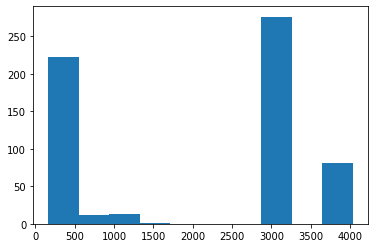

In [ ]:
plt.hist(img_df.w)

In [ ]:
img_df.astype({'w': 'int32'}).dtypes

name    object
h       object
w        int32
dtype: object

In [ ]:
print(img_df['w'].value_counts())

3024    276
4032     81
259      54
194      38
275      31
       ... 
184       1
243       1
182       1
306       1
1024      1
Name: w, Length: 67, dtype: int64


In [ ]:
img_df.loc[img_df['h']>100,:]

,name,h,w
0,00000047.jpg,194,259
1,00000101.jpg,194,259
2,00000104.jpg,194,259
3,00000121.jpg,259,194
4,00000134.jpg,194,259
...,...,...,...
600,Copy of 00000315.jpg,183,275
601,Copy of 00000303.jpg,284,178
602,cracks-2.jpg,645,860
603,Bay-Window-Movement.jpg,455,603


# get rid of too-small images

In [ ]:
def rejectSmall(base_directory,sizetoCheck,className):
    amount=0
    olddir= base_directory + className
    olddir2 = os.path.join(olddir,'')
    print(olddir)

    for counter, img in enumerate(os.listdir(olddir2)):
        #print(img)
        im = Image.open(olddir2+img)
        width, height = im.size
        #print(width, height, counter)
        if (width<sizetoCheck or height<sizetoCheck):
          amount=amount +1
          print(img)
          print(width, height)
          print(amount)

In [ ]:
names = ['JuneImages']
for className in names:
    #print('making new directory of images with size {} for class {}'.format(size,className))
    rejectSmall('/content/drive/My Drive/Inspector/DATA/', 300, className)

/content/drive/My Drive/Inspector/DATA/JuneImages


IsADirectoryError: ignored

In [ ]:
olddir= base_directory + 'new'
olddir2 = os.path.join(olddir,'')

In [ ]:
os.listdir(olddir2)

# To check the image quality

In [ ]:
for folder in ['JuneImages']:
  image_path = os.path.join(os.getcwd(), (folder))
  print(image_path)
  for file in os.listdir(image_path):
    filepath = os.path.join(image_path,file)
    #print(filepath)
    image = cv2.imread(filepath)
    file_type = imghdr.what(filepath)
    
    if file_type != 'jpeg':
      print(file + " - invalid - " + str(file_type))
      # cv2.imwrite(file, image)

In [ ]:
filelist=os.listdir('/content/drive/My Drive/Inspector/DATA/300/')
#glob.glob("/content/gdrive/My Drive/Inspector/models/research/object_detection/images/train/*.jpg")
for file_obj in filelist:
  try:
      jpg_str=os.popen("file \""+str(file_obj)+"\"").read()
      if (re.search('PNG image data', jpg_str, re.IGNORECASE)) or (re.search('Png patch', jpg_str, re.IGNORECASE)):
        print("Would be Deleting jpg as it contains png encoding - "+str(file_obj))
        #os.system("rm \""+str(file_obj)+"\"")
  except Exception as e:
    logging.error(traceback.format_exc())
print("Cleaning jps done")

In [ ]:
def verify_image(img_file):
    try:
        img = io.imread(image_path+img_file)
        print('ok')
    except:
        print('corrupt according to skimage')
    try:
        img = Image.open(image_path+img_file) # open the image file
        img.verify() # verify that it is, in fact an image
        print('opens in Pil')
    except:
        print('corrupt acc. to Pil')
    return 

In [ ]:
def verify_image2(img_file):
        img = io.imread(image_path+img_file)
        img = Image.open(image_path+img_file) # open the image file
        img.verify() # verify that it is, in fact an image
        return 

In [ ]:
%cd '/content/drive/MyDrive/Inspector/DATA/all_originals/'

/content/drive/MyDrive/Inspector/DATA/all_originals


In [ ]:
for file_obj in os.listdir(image_path):
  print(file_obj)
  verify_image(file_obj)

00000047.jpg
ok
opens in Pil
00000101.jpg
ok
opens in Pil
00000104.jpg
ok
opens in Pil
00000121.jpg
ok
opens in Pil
00000134.jpg
ok
opens in Pil
00000162 (1).jpg
ok
opens in Pil
00000173.jpg
ok
opens in Pil
00000273.jpg
ok
opens in Pil
00000009 (1).jpg
ok
opens in Pil
00000050.jpg
ok
opens in Pil
00000068 (1).jpg
ok
opens in Pil
00000111.jpg
ok
opens in Pil
00000161.jpg
ok
opens in Pil
00000174 (1).jpg
ok
opens in Pil
IMG_1518.png
ok
opens in Pil
IMG_1530.png
ok
opens in Pil
IMG_1646.png
ok
opens in Pil
IMG_1647.png
ok
opens in Pil
IMG_1651.png
ok
opens in Pil
image(0011).jpeg
ok
opens in Pil
image(0016).jpeg
ok
opens in Pil
image(0007).jpeg
ok
opens in Pil
image(0004).jpeg
ok
opens in Pil
image(0022).jpeg
ok
opens in Pil
image(0017).jpeg
ok
opens in Pil
image(0032).jpeg
ok
opens in Pil
image(0039).jpeg
ok
opens in Pil
image(0034).jpeg
ok
opens in Pil
image(0002).jpeg
ok
opens in Pil
image(0059).jpeg
ok
opens in Pil
image(0067).jpeg
ok
opens in Pil
image(0072).jpeg
ok
opens in Pil
imag

In [ ]:
!pwd

# To convert any png into jpg images

In [ ]:
%cd '/content/drive/My Drive/Inspector/DATA/JuneImages/'

/content/drive/My Drive/Inspector/DATA/JuneImages


In [ ]:
!pwd

/content/drive/My Drive/Inspector/DATA/JuneImages


In [ ]:
ls

In [ ]:
for file in glob("*.png"):
  print(file)
  im = Image.open(file)
  rgb_im = im.convert('RGB')
  rgb_im.save(file.replace("png", "jpg"), quality=95)
  os.remove(file)

In [ ]:
ls

# resize the images to a h & w

In [ ]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:

def rescale_images(base_directory, size, className):
    amount=0
    olddir= base_directory + className
    singledir= os.path.join(base_directory,str(size[1]))
    olddir2 = os.path.join(olddir,'')
    print(olddir2)
    singledir2 = os.path.join(singledir,'')
    print(singledir)
    if not os.path.exists(singledir): os.makedirs(singledir)

    for counter, img in enumerate(os.listdir(olddir2)):
        im = Image.open(olddir2+img)
        width, height = im.size
        if ((width>=size[1]) and (height>=size[1])):
          im_resized = im.resize(size, Image.ANTIALIAS)
          im_resized.save(singledir2+className+img)
          amount=amount +1
          print(img)
          print(width, height)
          print(amount)


In [ ]:
base_directory = '/content/drive/My Drive/Inspector/DATA/'


In [ ]:
size = (300,300)

In [ ]:
names = ['toSort', 'paintCrack', 'wallcrack','woodDamage', 'allnice','newFloor']

In [ ]:
names = ['newWalls']

In [ ]:
for className in names:
    print('making new directory of images with size {} for class {}'.format(size,className))
    rescale_images(base_directory, size, className)

In [ ]:
rmdir '/content/drive/My Drive/Inspector/DATA/300/newWalls/.ipynb_checkpoints'

# Make a train/valid/test set

Use this to split already annotated images:

https://pypi.org/project/annotated-images/


In [ ]:
!pip install annotated_images

In [ ]:
import annotated_images

# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
annotated_images.split('/content/drive/My Drive/Inspector/DATA/JuneImages/Originals/', '/content/drive/My Drive/Inspector/DATA/JuneImages/Originals/splits/', seed=1337, ratio=(.8, .2))

{'test': 48, 'total': 237, 'train': 189}

In [ ]:
cd JuneImages

[Errno 2] No such file or directory: 'JuneImages'
/content/drive/My Drive/Inspector/DATA/JuneImages


In [ ]:
base_dir = '/content/drive/My Drive/Inspector/DATA/'

In [ ]:
pwd

'/content/drive/My Drive/Inspector/DATA'

In [ ]:
import shutil

In [ ]:
# to move the xmls into a higher dir
for file in glob("*.xml"):
  print(file)
  shutil.move(base_dir + "JuneImages/"+ file, base_dir + "JuneXML/")

In [ ]:
#to move the images into a class folder ready for running split_folders
for file in glob("*.*"):
  print(file)
  shutil.move(base_dir + "JuneImages/"+ file, base_dir + "JuneImages/all/")

In [ ]:
!pip install split-folders

In [ ]:
original_dataset_dir = '/content/drive/My Drive/Inspector/DATA/JuneImages/Originals/'

In [ ]:
%automagic


Automagic is OFF, % prefix IS needed for line magics.


In [ ]:
data_dir = Path(original_dataset_dir)
data_dir = os.path.join(data_dir,'')
data_dir

'/content/drive/My Drive/Inspector/DATA/JuneImages/Originals/'

In [ ]:
splitUp_dir = os.path.join(data_dir, 'splits2/')
splitUp_dir

'/content/drive/My Drive/Inspector/DATA/JuneImages/Originals/splits2/'

In [ ]:
import split_folders

# Split with a ratio.
split_folders.ratio(data_dir, output=splitUp_dir, seed=1234, ratio=(.8, .2)) # default values

Copying files: 2 files [00:00, 15.38 files/s]


In [ ]:
image_path = '/content/drive/My Drive/Inspector/DATA/JuneImages/splits/val/all'
xml_path = '/content/drive/My Drive/Inspector/DATA/JuneXML/'

In [ ]:
cd '/content/drive/My Drive/Inspector/DATA/JuneImages/splits/val/all/'

/content/drive/My Drive/Inspector/DATA/JuneImages/splits/val/all


In [ ]:
for file in glob("*.JPG"):
  print(file)
  file_base = os.path.splitext(os.path.basename(file))
  print(file_base[0])
  try:
    shutil.move(xml_path + file_base[0] + '.xml', image_path)
  except:
    pass


# Creating csv files and Tfrecord files




The xml files from CVAT do not contain the bounding boxes they are just the image name and size, so the csv files are empty and then the tfrecords are empty.

**Using labelImg works **

The script below converts a list of files and their xml annotations file into one csv table.

In [ ]:
pwd

NameError: ignored

In [ ]:
%cd '/content/drive/My Drive/Inspector/DATA/JuneImages/Originals/splits'

/content/drive/My Drive/Inspector/DATA/JuneImages/Originals/splits


In [ ]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        print(xml_file)
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
            print(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df
def main(directory_list):
    for Image_cat in directory_list:
        image_path = os.path.join(os.getcwd(), '{}'.format(Image_cat))
        print(image_path)
        xml_df = xml_to_csv(image_path) 
        xml_df.to_csv('{}_labels.csv'.format(Image_cat), index=None)
        print('Successfully converted xml to csv.')



In [ ]:
main(['train','test']) 

/content/drive/My Drive/Inspector/DATA/JuneImages/Originals/splits/train
/content/drive/My Drive/Inspector/DATA/JuneImages/Originals/splits/train/IMG_1454.xml
('IMG_1454.jpeg', 3024, 3024, 'flakingPaint', 556, 1560, 749, 1903)
/content/drive/My Drive/Inspector/DATA/JuneImages/Originals/splits/train/IMG_1457.xml
('IMG_1457.jpeg', 3024, 3024, 'flakingPaint', 1774, 1557, 1974, 2214)
/content/drive/My Drive/Inspector/DATA/JuneImages/Originals/splits/train/IMG_1458.xml
('IMG_1458.jpeg', 3024, 3024, 'wallCrack', 70, 592, 227, 1135)
/content/drive/My Drive/Inspector/DATA/JuneImages/Originals/splits/train/IMG_1459.xml
('IMG_1459.jpeg', 3024, 3024, 'flakingPaint', 859, 1171, 1766, 1999)
/content/drive/My Drive/Inspector/DATA/JuneImages/Originals/splits/train/IMG_1466.xml
('IMG_1466.jpeg', 3024, 3024, 'flakingPaint', 1234, 2449, 1452, 2849)
/content/drive/My Drive/Inspector/DATA/JuneImages/Originals/splits/train/IMG_1467.xml
('IMG_1467.jpeg', 3024, 3024, 'flakingPaint', 702, 1985, 1334, 2253)
/c

The next script is the generate_tfrecords script from the link above - this should be run in the training notebook as all the protoc are built there.

In [ ]:
PATH_TO_ANNOTATIONS_FOLDER = '/content/drive/My Drive/Inspector/models/research/object_detection/data'

In [ ]:
"""
Usage:

# Create train data:
python generate_tfrecord.py --label=<LABEL> --csv_input=<PATH_TO_ANNOTATIONS_FOLDER>/train_labels.csv  --output_path=<PATH_TO_ANNOTATIONS_FOLDER>/train.record

# Create test data:
python generate_tfrecord.py --label=<LABEL> --csv_input=<PATH_TO_ANNOTATIONS_FOLDER>/test_labels.csv  --output_path=<PATH_TO_ANNOTATIONS_FOLDER>/test.record
"""

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf
import sys
sys.path.append("../../models/research")

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

flags = tf.app.flags
flags.DEFINE_string('csv_input', '', 'Path to the CSV input')
flags.DEFINE_string('output_path', '', 'Path to output TFRecord')
#flags.DEFINE_string('peelingPaint', '', 'Name of class[0] label')
# if your image has more labels input them as
# flags.DEFINE_string('label0', '', 'Name of class[0] label')
# flags.DEFINE_string('label1', '', 'Name of class[1] label')
# and so on.
flags.DEFINE_string('img_path', '', 'Path to images')
FLAGS = flags.FLAGS


# TO-DO replace this with label map
# for multiple labels add more else if statements
def class_text_to_int(row_label):

    # comment upper if statement and uncomment these statements for multiple labelling
    if row_label == 'peelingPaint':
       return 1
    elif row_label == 'wallCrack':
      return 2
    elif row_label == 'chippedPaint':
      return 3
    elif row_label == 'woodDamage':
      return 4
    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    # check if the image format is matching with your images.
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example


def main(_):
    writer = tf.python_io.TFRecordWriter(FLAGS.output_path)
    path = os.path.join(os.getcwd(), FLAGS.img_path)
    examples = pd.read_csv(FLAGS.csv_input)
    grouped = split(examples, 'filename')
    for group in grouped:
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())

    writer.close()
    output_path = os.path.join(os.getcwd(), FLAGS.output_path)
    print('Successfully created the TFRecords: {}'.format(output_path))


if __name__ == '__main__':
    tf.compat.v1.app.run()

# Check the created Tfrecords

In [ ]:
def serialize_example(feature0, feature1, feature2, feature3):
  """
  Creates a tf.Example message ready to be written to a file.
  """
  # Create a dictionary mapping the feature name to the tf.Example-compatible
  # data type.
  feature = {
      'feature0': _int64_feature(feature0),
      'feature1': _int64_feature(feature1),
      'feature2': _bytes_feature(feature2),
      'feature3': _float_feature(feature3),
  }

  # Create a Features message using tf.train.Example.

  example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
  return example_proto.SerializeToString()

In [ ]:
filenames = '/content/drive/My Drive/Inspector/models/research/object_detection/data/train.tfrecord'
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [ ]:
for raw_record in raw_dataset.take(10):
  print(repr(raw_record))

<tf.Tensor: shape=(), dtype=string, numpy=b'\n\xfe\x84\x01\n\x16\n\x0cimage/height\x12\x06\x1a\x04\n\x02\xac\x02\nc\n\x17image/object/class/text\x12H\nF\n\x0cflakingPaint\n\x0cflakingPaint\n\x0cflakingPaint\n\x0cflakingPaint\n\x0cflakingPaint\n2\n\x16image/object/bbox/ymin\x12\x18\x12\x16\n\x14\n\xd7#>\xe1z\x94>\xf9\xc5\x92>\xde\xdd\xdd>\xb5\x81\x0e?\n,\n\x0fimage/source_id\x12\x19\n\x17\n\x15newHouseIMG_1835.jpeg\n\xfb\x80\x01\n\rimage/encoded\x12\xe8\x80\x01\n\xe4\x80\x01\n\xe0\x80\x01\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01,\x01,\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x0

In [ ]:
for str_rec in tf.data.TFRecordDataset(filenames):
    example = tf.train.Example()
    example.ParseFromString(str_rec)
    print(dict(example.features.feature).keys())

# to download images from google images



paste this into the js console.

var urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl')); var hiddenElement = document.createElement('a'); hiddenElement.href = 'data:text/csv;charset=utf-8,' + encodeURI(urls.join('\n')); hiddenElement.target = '_blank'; hiddenElement.download = 'myFile.csv'; hiddenElement.click();


In [ ]:
from fastai.vision.data import *

In [ ]:
file = 'myFile-4.csv'

In [ ]:
path = Path('/content/drive/My Drive/Inspector/DATA/newWall')

dest = path
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
download_images(path/file, dest, max_pics=400)

In [ ]:
!apt install imagemagick


In [ ]:
!bash <(wget -qO- git.io/get-googliser)

In [ ]:
!googliser --phrase "damaged woodfloor" --number 200 --type photo --minimum-pixels xga -o data -G

# Look at TFrecords

In [ ]:
raw_image_dataset = tf.data.TFRecordDataset('/content/drive/My Drive/Inspector/models/research/object_detection/data/train.tfrecord')

In [ ]:
import tensorflow as tf

In [ ]:
# Create a dictionary describing the features.
image_feature_description = {
    'image/height': tf.io.FixedLenFeature([], tf.int64),
    'image/width': tf.io.FixedLenFeature([], tf.int64),
}

def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

In [ ]:
raw_image_dataset

In [ ]:
for raw_record in raw_image_dataset.take(3):
  example = tf.train.Example()
  #example.ParseFromString(raw_record.numpy())
  print(example)

In [ ]:
mypath='/content/drive/My Drive/Inspector/DATA/all224ROOT/splits/train'